In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#boston_dataset

In [ ]:
#boston_pd

In [ ]:
#Load the data and divide into X and Y varaiable
#boston_pd = pd.DataFrame(boston_dataset.data) 
#boston_pd.columns = boston_dataset.feature_names 
#boston_pd_target = np.asarray(boston_dataset.target) 
#boston_pd['House Price'] = pd.Series(boston_pd_target) 

# input 
#X = boston_pd.iloc[:, :-1] 

#output 
#Y = boston_pd.iloc[:, -1] 

#print(boston_pd.head()) 


In [ ]:
#boston_pd.to_csv('boston.csv')

In [3]:
boston_pd = pd.read_csv('boston.csv')
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = boston_pd.iloc[:, :-1] 
Y = boston_pd.iloc[:, -1] 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1],
                                                    boston_pd.iloc[:, -1],
                                                    test_size=0.25)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

In [6]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 


Mean squared Error on test set :  25.82034531866693
    Columns  Coefficient Estimate
0      CRIM             -0.112879
1        ZN              0.055634
2     INDUS              0.004854
3      CHAS              1.603349
4       NOX            -18.134703
5        RM              3.419266
6       AGE              0.008132
7       DIS             -1.550892
8       RAD              0.297235
9       TAX             -0.011777
10  PTRATIO             -1.003335
11        B              0.009118
12    LSTAT             -0.555455


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

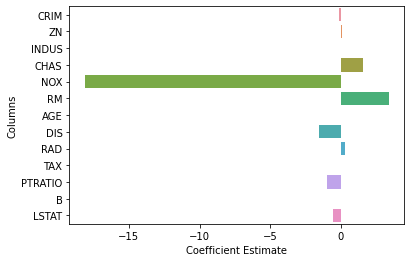

In [7]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [8]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 2) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


26.152437317789932
    Columns  Coefficient Estimate
0      CRIM             -0.106488
1        ZN              0.057029
2     INDUS             -0.041191
3      CHAS              1.574912
4       NOX             -6.508683
5        RM              3.462328
6       AGE             -0.002401
7       DIS             -1.380695
8       RAD              0.280293
9       TAX             -0.013274
10  PTRATIO             -0.867160
11        B              0.009944
12    LSTAT             -0.571695


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

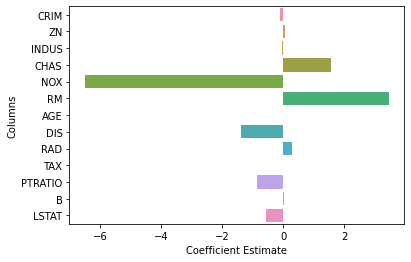

In [9]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

#### # import Lasso regression from sklearn library 



In [10]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 0.05) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 26.91722097289086
    Columns  Coefficient Estimate
0      CRIM             -0.102698
1        ZN              0.057609
2     INDUS             -0.054592
3      CHAS              0.957320
4       NOX             -1.083527
5        RM              3.454154
6       AGE             -0.005609
7       DIS             -1.272631
8       RAD              0.274181
9       TAX             -0.014295
10  PTRATIO             -0.804801
11        B              0.010355
12    LSTAT             -0.582648


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

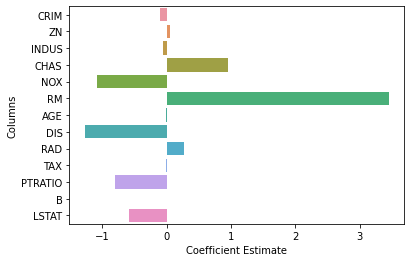

In [11]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

In [12]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .01,l1_ratio=.5) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 26.21381620324288


,Columns,Coefficient Estimate
0,CRIM,-0.106186
1,ZN,0.057086
2,INDUS,-0.042020
3,CHAS,1.511327
4,NOX,-6.102355
5,RM,3.457399
6,AGE,-0.002567
7,DIS,-1.371807
8,RAD,0.279984
9,TAX,-0.013363


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

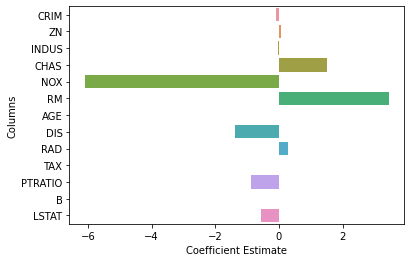

In [13]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff)

In [14]:
pd.DataFrame({'Lreg':lreg.coef_,'lasso':lasso.coef_,'ridge':ridgeR.coef_,'elastic':e_net.coef_})

,Lreg,lasso,ridge,elastic
0,-0.112879,-0.102698,-0.106488,-0.106186
1,0.055634,0.057609,0.057029,0.057086
2,0.004854,-0.054592,-0.041191,-0.042020
3,1.603349,0.957320,1.574912,1.511327
4,-18.134703,-1.083527,-6.508683,-6.102355
5,3.419266,3.454154,3.462328,3.457399
6,0.008132,-0.005609,-0.002401,-0.002567
7,-1.550892,-1.272631,-1.380695,-1.371807
8,0.297235,0.274181,0.280293,0.279984
9,-0.011777,-0.014295,-0.013274,-0.013363
